In [1]:
#Importe aquí las bibliotecas necesarias
import scipy.io
%matplotlib inline
from pandas import read_csv
import numpy as np    #Para el manejo de arreglos
import pandas as pd   #Para el manejo de conjuntos de datos, tratados como tablas
import seaborn as sns #Para la construcción y visualización de gráficos
import matplotlib.pyplot as plt #Pra la construcción de gráficos

from sklearn import metrics #Las métricas de rendimiento de un clasificador
from sklearn import model_selection #Para el particionamiento de los conjuntos de datos
from sklearn import datasets #Conjuntos de datos predefinidos en sklearn
from sklearn import preprocessing #Nos ayuda a convertir características categóricas a numéricas

from sklearn import naive_bayes #importamos la librería que contiene el clasificador de Bayes
from sklearn import discriminant_analysis  # LDA & QDA
from sklearn import svm  # SVM

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

# 1.1 Lectura del conjunto de datos¶
Empezamos cargando el dataset, el cual se está disponible Sklearn:

In [2]:
names = ["classes","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"]
data = read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', names=names)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
classes                     8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Miramos la descripción de los datos

In [3]:
data.describe()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Procedemos a particionar el conjunto usando el 70% de los datos para entrenamiento y 30% para probar el modelo que se genera. NOTE QUE solo usamos las características 1, y no toda la matriz de datos.

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['classes'])
y = data['classes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

print('Train:', X_train.shape, y_train.shape)
print('Test:',  X_test.shape, y_test.shape)

Train: (5686, 22) (5686,)
Test: (2438, 22) (2438,)


# Codificación de las variables categóricas

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

def prepare_inputs(X_train, X_test):
    X_train_enc = pd.get_dummies(X_train, columns=X_train.columns, drop_first=False)
    X_test_enc  = pd.get_dummies(X_test, columns=X_test.columns, drop_first=False)
    return X_train_enc, X_test_enc

# encode target labels with values between 0 and n_classes-1
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

X_train, X_test = prepare_inputs(X_train, X_test)
y_train, y_test = prepare_targets(y_train, y_test)

print('X train:', X_train.shape)
print('X test:', X_test.shape)

X train: (5686, 465)
X test: (2438, 465)


### 1.2. Entrenamos los modelos

En este caso entrenamos 3 svm's  distintas:
- Una SVM Lineal
- Una SVM de base Radial y
- Una SVM Polinomial

In [12]:
#Especificamos los modelos a usar - SVM Lineal
svm_lineal = svm.SVC(kernel='linear', C=1.0, random_state=0)
svm_rbf = svm.SVC(kernel='rbf', C=1.0, random_state=0)
svm_poly = svm.SVC(kernel='poly', C=1.0, random_state=0)

# Entrenamos los modelos
svm_lineal.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

### 1.3. Medimos la precisión de los modelos en el conjunto de test

Medimos la precisión y mostramos las matrices de confusión de los 3 modelos

Precisión del clasificador Lineal: 100.00 


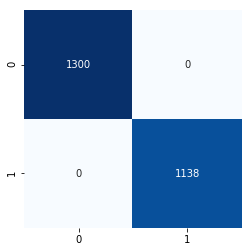

In [13]:
#Predecimos la clase del conjunto de test
y_pred = svm_lineal.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
mat = metrics.confusion_matrix(y_test, y_pred)

print ("Precisión del clasificador Lineal: %.2f " %(acc*100.0) )

sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")

# Una SVM radial

In [14]:
#Especificamos los modelos a usar - SVM Lineal
svm_rbf = svm.SVC(kernel='rbf', C=1.0, random_state=0)
svm_rbf.fit(X_train, y_train)

C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

Precisión del clasificador radial: 99.88 


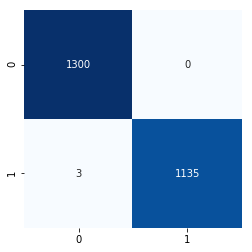

In [15]:
#Predecimos la clase del conjunto de test
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = metrics.accuracy_score(y_test, y_pred_rbf)
mat_rbf = metrics.confusion_matrix(y_test, y_pred_rbf)

print ("Precisión del clasificador radial: %.2f " %(acc_rbf*100.0) )

sns.heatmap(mat_rbf, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")

### Una SVM polinomial

In [16]:
#Especificamos los modelos a usar - SVM polinomial
svm_poly = svm.SVC(kernel='poly', C=1.0, random_state=0)
svm_poly.fit(X_train, y_train)

C:\Users\Lina\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

Precisión del clasificador polinomial: 99.26 


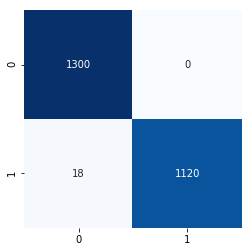

In [18]:
#Predecimos la clase del conjunto de test
y_pred_poly = svm_poly.predict(X_test)
acc_poly = metrics.accuracy_score(y_test, y_pred_poly)
mat_poly = metrics.confusion_matrix(y_test, y_pred_poly)

print ("Precisión del clasificador polinomial: %.2f " %(acc_poly*100.0) )

sns.heatmap(mat_poly, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")